In [1]:
# Import necessary libraries. In this predictive analytics, I will be using
# XGBoost, KNN, Random Forest, Decision Tree, and Quadratic Discriminant Analysis (QDA)
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import xgboost as xgb

from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
# Read csv to pandas dataframe and drop full missing values column
df = pd.read_csv('dataset.csv').drop(columns="Unnamed: 83", axis = 1)
df.head(3)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0


In [3]:
# Data types of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [4]:
# Descriptive Statistic of each attribute
df.describe().round(3)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,91713.000,91713.000,91713.000,87485.000,88284.000,91713.000,90379.000,91713.000,91713.000,88993.000,...,83766.000,90998.000,90998.000,90998.000,90998.000,90998.000,90998.000,90998.000,90998.000,91713.000
mean,65606.079,65537.131,105.669,62.310,29.186,0.184,169.642,508.358,0.836,84.028,...,0.044,0.001,0.016,0.225,0.013,0.026,0.007,0.004,0.021,0.086
std,37795.089,37811.252,62.854,16.775,8.275,0.387,10.795,228.990,2.488,25.011,...,0.217,0.029,0.124,0.418,0.113,0.160,0.084,0.064,0.142,0.281
min,1.000,1.000,2.000,16.000,14.845,0.000,137.200,82.000,-24.947,38.600,...,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,32852.000,32830.000,47.000,52.000,23.642,0.000,162.500,369.000,0.035,66.800,...,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,65665.000,65413.000,109.000,65.000,27.655,0.000,170.100,504.000,0.139,80.300,...,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,98342.000,98298.000,161.000,75.000,32.930,0.000,177.800,679.000,0.409,97.100,...,0.060,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,131051.000,131051.000,204.000,89.000,67.815,1.000,195.590,927.000,159.091,186.000,...,0.970,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [5]:
# Row and column of dataframe
df.shape

(91713, 84)

In [6]:
# Check NULL value(s) for every column
for i in df.columns:
    null_val = df[i].isnull().sum()
    print(f"NULL values in column {i}   : {null_val}")

NULL values in column encounter_id: 0
NULL values in column patient_id: 0
NULL values in column hospital_id: 0
NULL values in column age: 4228
NULL values in column bmi: 3429
NULL values in column elective_surgery: 0
NULL values in column ethnicity: 1395
NULL values in column gender: 25
NULL values in column height: 1334
NULL values in column icu_admit_source: 112
NULL values in column icu_id: 0
NULL values in column icu_stay_type: 0
NULL values in column icu_type: 0
NULL values in column pre_icu_los_days: 0
NULL values in column weight: 2720
NULL values in column apache_2_diagnosis: 1662
NULL values in column apache_3j_diagnosis: 1101
NULL values in column apache_post_operative: 0
NULL values in column arf_apache: 715
NULL values in column gcs_eyes_apache: 1901
NULL values in column gcs_motor_apache: 1901
NULL values in column gcs_unable_apache: 1037
NULL values in column gcs_verbal_apache: 1901
NULL values in column heart_rate_apache: 878
NULL values in column intubated_apache: 715
N

In [7]:
# Encode categorical attribute, I'm using ordinal encoder so that it does not label
# NULL values as a class    
encode_attribute = ['ethnicity',
                    'gender',
                    'icu_admit_source', 
                    'icu_stay_type',
                    'icu_type', 
                    'apache_3j_bodysystem', 
                    'apache_2_bodysystem']

OE = OrdinalEncoder()
df[encode_attribute] = OE.fit_transform(df[encode_attribute])

In [8]:
# Filling missing numerical values with its mean
mean_attribute = ['age', 'bmi', 'height', 'weight']

for j in mean_attribute:
    df[j].fillna(df[j].mean(), inplace=True)
    df[j] = df[j].round()

In [9]:
# Filling missing numerical values with its next row of dataframe
ffill_attribute = ['apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache', 
                   'gcs_eyes_apache', 'gcs_motor_apache',
                   'gcs_unable_apache', 'gcs_verbal_apache',
                   'heart_rate_apache', 'intubated_apache',
                   'map_apache', 'resprate_apache',
                   'temp_apache', 'ventilated_apache',
                   'd1_diasbp_max', 'd1_diasbp_min',
                   'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
                   'd1_heartrate_max', 'd1_heartrate_min',
                   'd1_mbp_max', 'd1_mbp_min',
                   'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min',
                   'd1_resprate_max', 'd1_resprate_min',
                   'd1_spo2_max', 'd1_spo2_min',
                   'd1_sysbp_max','d1_sysbp_min',
                   'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
                   'd1_temp_max', 'd1_temp_min',
                   'h1_diasbp_max', 'h1_diasbp_min',
                   'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
                   'h1_heartrate_max', 'h1_heartrate_min',
                   'h1_mbp_max', 'h1_mbp_min',
                   'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min',
                   'h1_resprate_max','h1_resprate_min',
                   'h1_spo2_max','h1_spo2_min',
                   'h1_sysbp_max','h1_sysbp_min',
                   'h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min',
                   'd1_glucose_max','d1_glucose_min',
                   'd1_potassium_max','d1_potassium_min',
                   'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',]

for k in ffill_attribute:
    df[k].fillna(df[k].ffill(), inplace = True)

df.dropna(axis=0, inplace=True)
df = df.astype('int64')

In [10]:
# Row and column of dataframe after preprocessing
df.shape

(88576, 84)

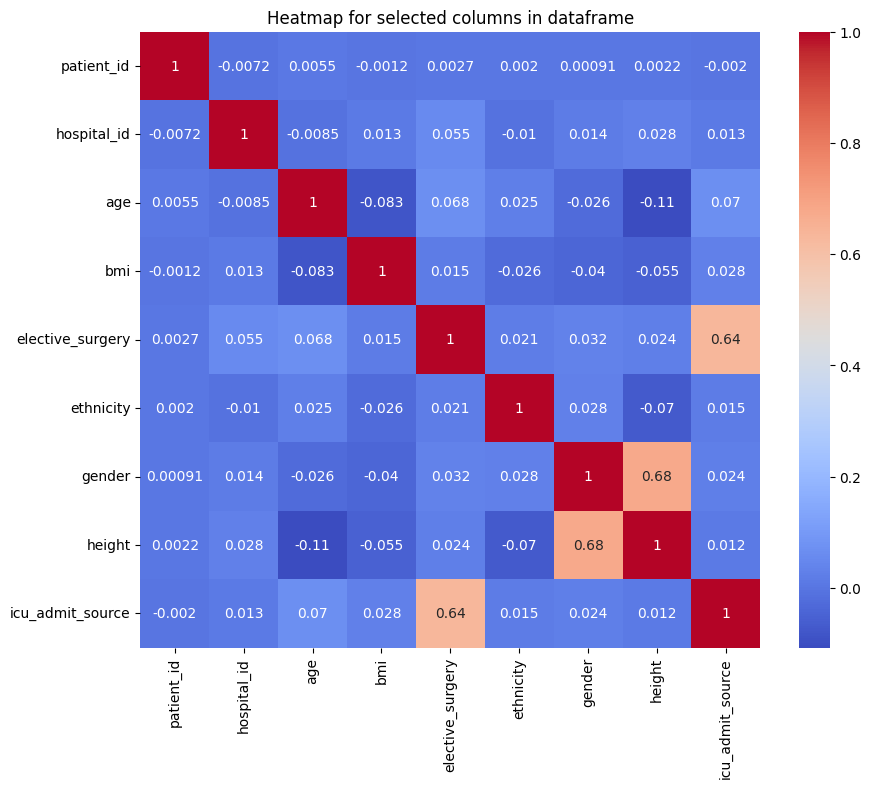

In [11]:
# Data understanding using correlation matrix, here I'll be taking from attribute 1-10 only
corr_matrix = df.corr()
selected_cols = corr_matrix.iloc[1:10:, 1:10:]
plt.figure(figsize=(10, 8))
plt.title('Heatmap for selected columns in dataframe')
sns.heatmap(selected_cols, cmap='coolwarm', annot=True)
plt.show()

In [12]:
# Identify features, target variable, and dropping unnecessary columns 
X = df.drop(
        columns='encounter_id',
    ).drop(
        columns='patient_id',
    ).drop(
        columns='hospital_id',
    ).drop(
        columns='ethnicity',
    ).drop(
        columns='gender',
    ).drop(
        columns='hospital_death'
    )
y = df['hospital_death']

# Oversampling to address class imbalance in dataframe
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Splitting and training data with resampled dataframe
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state = 42, test_size = 0.2)
SScaler = StandardScaler()
X_train = SScaler.fit_transform(X_train)
X_test = SScaler.transform(X_test)

In [13]:
# Predictive analysis with KNN
knn_classification = KNeighborsClassifier(n_neighbors = 303)
knn_classification.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=303)

In [14]:
# Print KNN prediction in dataframe format
knn_prediction = knn_classification.predict(X_test)
pd.DataFrame({'KNN Prediction': knn_prediction, 
              'Y Testing': y_test})

,KNN Prediction,Y Testing
135048,0,1
120983,1,1
87247,0,1
14150,1,1
138209,0,1
...,...,...
63751,1,0
17471,1,1
18844,1,0
100406,1,1


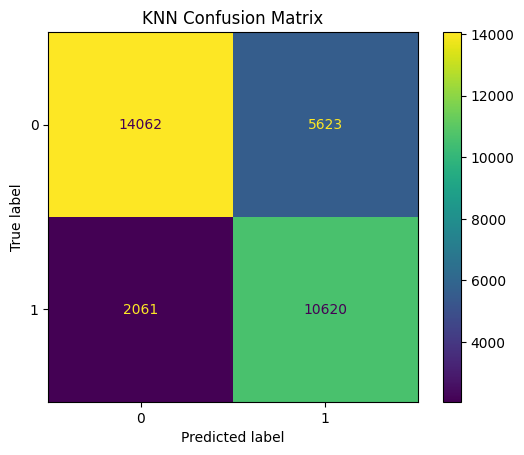

In [15]:
# Finding out True Positive (TP), True Negative (TN), 
# False Positive (FP), False Negative (FN) for KNN using confusion matrix
KNN_confusionMatrix = confusion_matrix(knn_prediction, y_test)
KNN_confusionMatrixDisplay = ConfusionMatrixDisplay(KNN_confusionMatrix).plot()
plt.title('KNN Confusion Matrix')
plt.show()

In [16]:
# Accuracy for KNN
KNN_classificationReport = classification_report(knn_prediction, y_test)
print(KNN_classificationReport)

              precision    recall  f1-score   support

           0       0.87      0.71      0.79     19685
           1       0.65      0.84      0.73     12681

    accuracy                           0.76     32366
   macro avg       0.76      0.78      0.76     32366
weighted avg       0.79      0.76      0.77     32366



In [17]:
# Predictive analysis with Random Forest
rforest_classification = RandomForestClassifier(max_depth=50)
rforest_classification.fit(X_train, y_train)

RandomForestClassifier(max_depth=50)

In [18]:
# Print Random Forest prediction in dataframe format
rforest_prediction = rforest_classification.predict(X_test)
pd.DataFrame({'Random Forest Prediction': rforest_prediction, 
              'Y Testing': y_test})

,Random Forest Prediction,Y Testing
135048,1,1
120983,1,1
87247,1,1
14150,1,1
138209,1,1
...,...,...
63751,0,0
17471,1,1
18844,0,0
100406,1,1


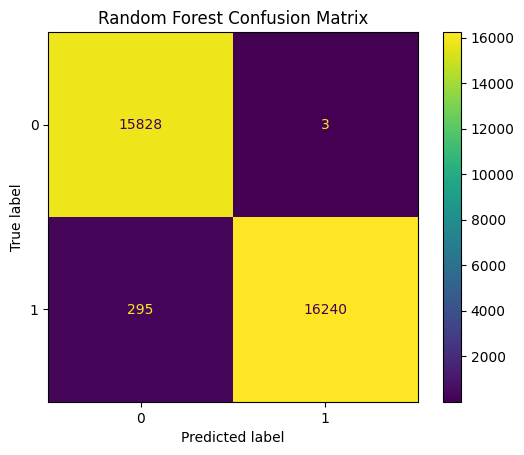

In [19]:
# Finding out True Positive (TP), True Negative (TN), 
# False Positive (FP), False Negative (FN) for Random Forest using confusion matrix
rforest_confmatrix = confusion_matrix(rforest_prediction, y_test)
rforest_confdisplay= ConfusionMatrixDisplay(rforest_confmatrix).plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

In [20]:
# Accuracy for Random Forest
rforest_creport = classification_report(rforest_prediction, y_test)
print(rforest_creport)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15831
           1       1.00      0.98      0.99     16535

    accuracy                           0.99     32366
   macro avg       0.99      0.99      0.99     32366
weighted avg       0.99      0.99      0.99     32366



In [21]:
# Predictive analysis with XGBoost
xgb_classification = xgb.XGBClassifier(random_state=42)
xgb_classification.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [22]:
# Print XGBoost prediction in dataframe format
xgb_prediction = xgb_classification.predict(X_test)
pd.DataFrame({'XGBoost Prediction': xgb_prediction, 
              'Y Testing': y_test})

,XGBoost Prediction,Y Testing
135048,1,1
120983,1,1
87247,0,1
14150,1,1
138209,1,1
...,...,...
63751,0,0
17471,1,1
18844,0,0
100406,1,1


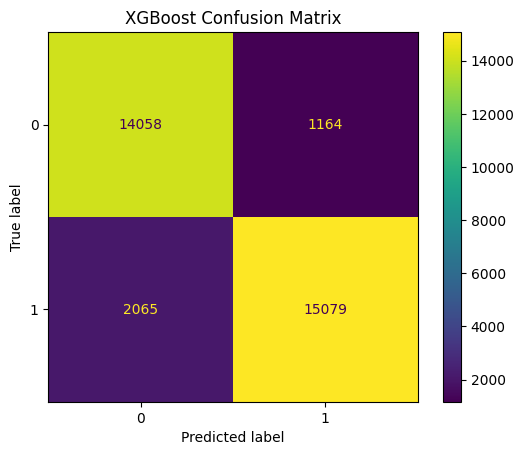

In [23]:
# Finding out True Positive (TP), True Negative (TN), 
# False Positive (FP), False Negative (FN) for XGBoost using confusion matrix
xgb_confmatrix = confusion_matrix(xgb_prediction, y_test)
xgb_confdisplay= ConfusionMatrixDisplay(xgb_confmatrix).plot()
plt.title('XGBoost Confusion Matrix')
plt.show()

In [24]:
# Accuracy for XGBoost
xgb_creport = classification_report(xgb_prediction, y_test)
print(xgb_creport)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     15222
           1       0.93      0.88      0.90     17144

    accuracy                           0.90     32366
   macro avg       0.90      0.90      0.90     32366
weighted avg       0.90      0.90      0.90     32366



In [25]:
# Predictive analysis with Decision Trees
dtree_classification = DecisionTreeClassifier(random_state = 42)
dtree_classification.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
# Print Decision Tree prediction in dataframe format
dtree_prediction = dtree_classification.predict(X_test)
pd.DataFrame({'Decision Tree Prediction': dtree_prediction
              , 'Y Testing': y_test})

,Decision Tree Prediction,Y Testing
135048,1,1
120983,1,1
87247,1,1
14150,1,1
138209,1,1
...,...,...
63751,0,0
17471,1,1
18844,1,0
100406,1,1


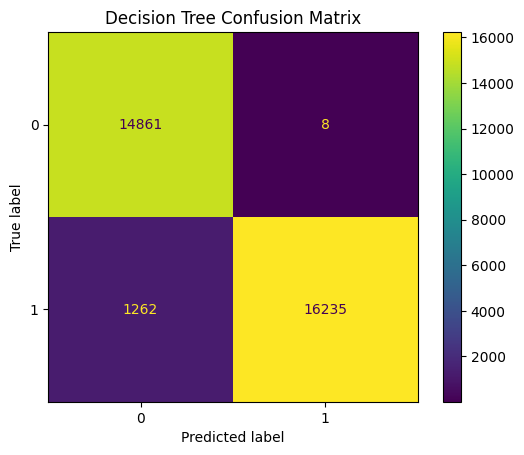

In [27]:
# Finding out True Positive (TP), True Negative (TN), 
# False Positive (FP), False Negative (FN) for Decision Tree using confusion matrix
dtree_confmatrix = confusion_matrix(dtree_prediction, y_test)
dtree_confdisplay= ConfusionMatrixDisplay(dtree_confmatrix).plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [28]:
# Accuracy for Decision Tree
dtree_creport = classification_report(dtree_prediction, y_test)
print(dtree_creport)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14869
           1       1.00      0.93      0.96     17497

    accuracy                           0.96     32366
   macro avg       0.96      0.96      0.96     32366
weighted avg       0.96      0.96      0.96     32366



In [29]:
# Predictive analysis with QDA
qda_classification = QuadraticDiscriminantAnalysis()
qda_classification.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [30]:
# Print Decision Tree prediction in dataframe format
qda_prediction = qda_classification.predict(X_test)
pd.DataFrame({'Quadratic Discriminant Analysis Prediction': qda_prediction
              , 'Y Testing': y_test})

,Quadratic Discriminant Analysis Prediction,Y Testing
135048,1,1
120983,1,1
87247,0,1
14150,1,1
138209,0,1
...,...,...
63751,1,0
17471,1,1
18844,0,0
100406,0,1


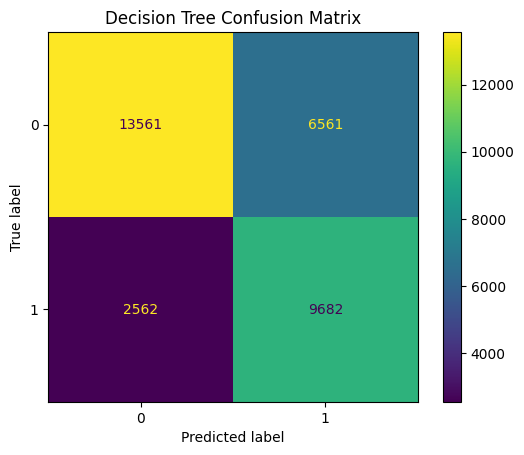

In [31]:
# Finding out True Positive (TP), True Negative (TN), 
# False Positive (FP), False Negative (FN) for QDA using confusion matrix
qda_confmatrix = confusion_matrix(qda_prediction, y_test)
qda_confdisplay= ConfusionMatrixDisplay(qda_confmatrix).plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [33]:
# Accuracy for QDA
qda_creport = classification_report(qda_prediction, y_test)
print(qda_creport)

              precision    recall  f1-score   support

           0       0.84      0.67      0.75     20122
           1       0.60      0.79      0.68     12244

    accuracy                           0.72     32366
   macro avg       0.72      0.73      0.71     32366
weighted avg       0.75      0.72      0.72     32366

